# EDA & Data preprocessing

## Chargement des libraries

In [51]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm

## Importation des donnees

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
df_speedating = pd.read_csv('/content/drive/My Drive/Datasets/Speed_Dating_Data.csv', encoding="ISO-8859-1")

## Exploration des données

In [54]:
df_speedating.info() # Information génériques de la dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 195 entries, iid to amb5_3
dtypes: float64(174), int64(13), object(8)
memory usage: 12.5+ MB


In [55]:
print(df_speedating.shape) # Dimension de la dataframe
df_speedating.head(10)     # View des 10 premières entrées

(8378, 195)


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,...,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.00,20.00,20.00,20.00,0.00,5.00,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.00,0.00,0.00,40.00,0.00,0.00,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.00,18.00,19.00,18.00,14.00,12.00,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.00,5.00,15.00,40.00,5.00,5.00,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,5,15.0,1,0.21,0,24.0,3.0,30.00,10.00,20.00,10.00,10.00,20.00,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
5,1,1.0,0,1,1,1,10,7,NaN,6,6,16.0,0,0.25,0,25.0,2.0,50.00,0.00,30.00,10.00,0.00,10.00,1,7.0,7.0,8.0,8.0,7.0,7.0,7.0,6.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
6,1,1.0,0,1,1,1,10,7,NaN,1,7,17.0,0,0.34,0,30.0,2.0,35.00,15.00,25.00,10.00,5.00,10.00,0,3.0,6.0,7.0,5.0,8.0,7.0,2.0,1.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
7,1,1.0,0,1,1,1,10,7,NaN,2,8,18.0,0,0.50,0,27.0,2.0,33.33,11.11,11.11,11.11,11.11,22.22,0,6.0,7.0,5.0,6.0,8.0,6.0,7.0,5.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
8,1,1.0,0,1,1,1,10,7,NaN,8,9,19.0,1,0.28,0,28.0,2.0,50.00,0.00,25.00,10.00,0.00,15.00,1,7.0,7.0,8.0,8.0,8.0,9.0,6.5,8.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
9,1,1.0,0,1,1,1,10,7,NaN,9,10,20.0,0,-0.36,0,24.0,2.0,100.00,0.00,0.00,0.00,0.00,0.00,0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [56]:
## Identifier toutes les variables avec les données manquantes supérieurs à 20%
missing_data = round(100*(df_speedating.isnull().sum())/df_speedating.shape[0], 1)
remov_missing_data = missing_data[missing_data >= 20]
print(remov_missing_data)

##Les variables qui sont retirés du dataset
print(len(remov_missing_data)) #le nombre de variables
remov_missing_data.index       #les noms des variables

positin1    22.0
undergra    41.3
mn_sat      62.6
tuition     57.2
income      48.9
            ... 
attr5_3     75.9
sinc5_3     75.9
intel5_3    75.9
fun5_3      75.9
amb5_3      75.9
Length: 90, dtype: float64
90


Index(['positin1', 'undergra', 'mn_sat', 'tuition', 'income', 'expnum',
       'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1',
       'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'attr1_s',
       'sinc1_s', 'intel1_s', 'fun1_s', 'amb1_s', 'shar1_s', 'attr3_s',
       'sinc3_s', 'intel3_s', 'fun3_s', 'amb3_s', 'attr7_2', 'sinc7_2',
       'intel7_2', 'fun7_2', 'amb7_2', 'shar7_2', 'attr4_2', 'sinc4_2',
       'intel4_2', 'fun4_2', 'amb4_2', 'shar4_2', 'attr2_2', 'sinc2_2',
       'intel2_2', 'fun2_2', 'amb2_2', 'shar2_2', 'attr5_2', 'sinc5_2',
       'intel5_2', 'fun5_2', 'amb5_2', 'you_call', 'them_cal', 'date_3',
       'numdat_3', 'num_in_3', 'attr1_3', 'sinc1_3', 'intel1_3', 'fun1_3',
       'amb1_3', 'shar1_3', 'attr7_3', 'sinc7_3', 'intel7_3', 'fun7_3',
       'amb7_3', 'shar7_3', 'attr4_3', 'sinc4_3', 'intel4_3', 'fun4_3',
       'amb4_3', 'shar4_3', 'attr2_3', 'sinc2_3', 'intel2_3', 'fun2_3',
       'amb2_3', 'shar2_3', 'attr3_3', 'sinc3_3', 'intel3_3'

In [57]:
##Creation du dataset sans les variables avec plus 20% de données manquantes
df1_speedating = df_speedating.drop(remov_missing_data.index, axis = 1)
df1_speedating.head()

,iid,id,gender,idg,condtn,wave,round,position,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,race,imprace,imprelig,from,zipcode,...,intel1_1,fun1_1,amb1_1,shar1_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,satis_2,length,numdat_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2
0,1,1.0,0,1,1,1,10,7,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,"60,521",...,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,6.0,2.0,1.0,19.44,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
1,1,1.0,0,1,1,1,10,7,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,"60,521",...,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,6.0,2.0,1.0,19.44,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
2,1,1.0,0,1,1,1,10,7,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,"60,521",...,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,6.0,2.0,1.0,19.44,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
3,1,1.0,0,1,1,1,10,7,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,"60,521",...,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,2.0,4.0,6.0,2.0,1.0,19.44,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0
4,1,1.0,0,1,1,1,10,7,7,5,15.0,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,Law,1.0,4.0,2.0,4.0,Chicago,"60,521",...,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,2.0,4.0,6.0,2.0,1.0,19.44,16.67,13.89,22.22,11.11,16.67,6.0,7.0,8.0,7.0,6.0


In [58]:
round(100*(df1_speedating.isnull().sum())/df1_speedating.shape[0], 1)

iid          0.0
id           0.0
gender       0.0
idg          0.0
condtn       0.0
            ... 
attr3_2     10.9
sinc3_2     10.9
intel3_2    10.9
fun3_2      10.9
amb3_2      10.9
Length: 105, dtype: float64

In [59]:
df1_speedating.info() # Information génériques de la dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8378 entries, 0 to 8377
Columns: 105 entries, iid to amb3_2
dtypes: float64(88), int64(13), object(4)
memory usage: 6.7+ MB


In [60]:
df1_speedating.describe()

,iid,id,gender,idg,condtn,wave,round,position,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,goal,date,go_out,...,intel1_1,fun1_1,amb1_1,shar1_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,satis_2,length,numdat_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8296.000000,8315.000000,8299.000000,8299.000000,8299.000000,8281.000000,8299.000000,...,8299.000000,8289.000000,8279.000000,8257.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8289.000000,8273.000000,8273.000000,8273.000000,8273.000000,8273.000000,8378.000000,8176.000000,8101.000000,8082.000000,8028.000000,7666.000000,7311.000000,8138.000000,8069.000000,8003.000000,7205.000000,7463.000000,7463.000000,7433.000000,7445.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,8.927668,8.963595,283.863767,0.164717,0.196010,0.395799,26.364999,2.756653,22.495347,17.396867,20.270759,17.459714,10.685375,11.845930,0.419551,6.190411,7.175256,7.369301,6.400599,6.778409,5.474870,6.134498,5.208251,1.960215,26.358928,7.662488,2.757186,3.784793,3.651645,2.122063,5.006762,2.158091,...,20.265613,17.457043,10.682539,11.845111,30.362192,13.273691,14.416891,18.422620,11.744499,11.854817,7.084733,8.294935,7.704460,8.403965,7.578388,0.419909,6.189995,7.175164,7.368597,6.400598,6.777524,5.474559,6.134087,5.207523,0.948769,3.207814,5.711510,1.843495,2.338087,26.217194,15.865084,17.813755,17.654765,9.913436,12.760263,7.125285,7.931529,8.238912,7.602171,7.486802
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.477009,5.491068,158.584899,0.370947,0.303539,0.489051,3.563648,1.230689,12.569802,7.044003,6.782895,6.085526,6.126544,6.362746,0.493515,1.950305,1.740575,1.550501,1.954078,1.794080,2.156163,1.841258,2.129354,0.245925,3.566763,3.758935,1.230905,2.845708,2.805237,1.407181,1.444531,1.105246,...,6.783003,6.085239,6.124888,6.362154,16.249937,6.976775,6.263304,6.577929,6.886532,6.167314,1.395783,1.407460,1.564321,1.076608,1.778315,0.493573,1.950169,1.740315,1.550453,1.953702,1.794055,2.156363,1.841285,2.129565,0.989889,2.444813,1.820764,0.975662,0.631240,14.388694,6.658494,6.535894,6.129746,5.675550,6.651547,1.371390,1.503236,1.180280,1.548200,1.744634
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-0.830000,0.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,4.000000,1.000000,2.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,154.000000,0.000000,-0.020000,0.000000,24.000000,2.000000,15.000000,15.000000,17.390000,15.000000,5.000000,9.520000,0.000000,5.000000,6.000000,6.0

# Analyse univariée

### Données du sujet d'étude

In [71]:
## Les variables des données du sujet d'étude
var_quant = ['age', 'int_corr', 'sports',	'tvsports',	'exercise',	'dining', 'museums',	
             'art',	'hiking', 'gaming',	'clubbing',	'reading',	'tv', 'theater',	
             'movies',	'concerts',	'music',	'shopping',	'yoga',	'exphappy']
var_qual = ['match', 'samerace', 'gender', 'field',
              'race',	'imprace',	'imprelig',	'goal',	'date',	'go_out',	
              'career_c'] ##Donnes qualtitatives             

In [72]:
df2 = df1_speedating.loc[:, var_quant] #Variables continues
df3 = df1_speedating.loc[:, var_qual] #Variables qualitatives

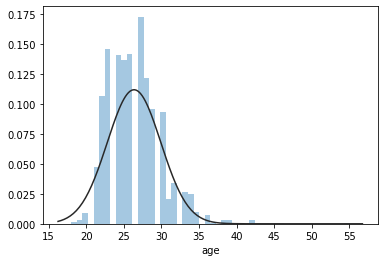

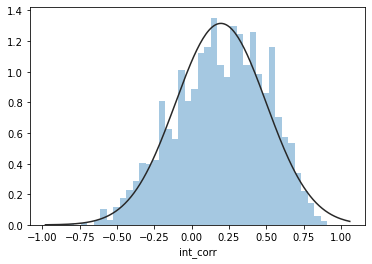

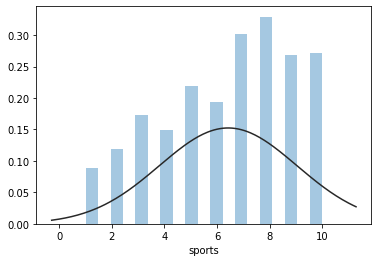

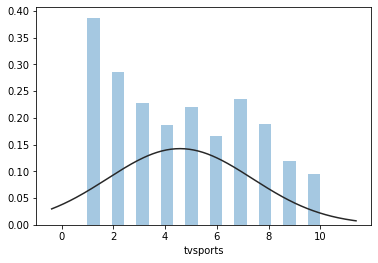

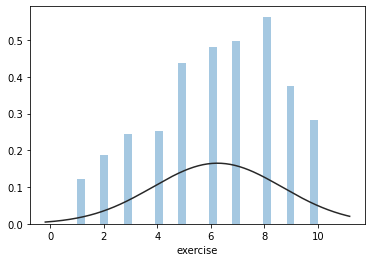

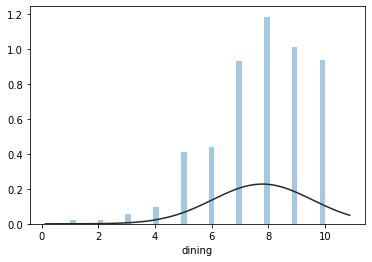

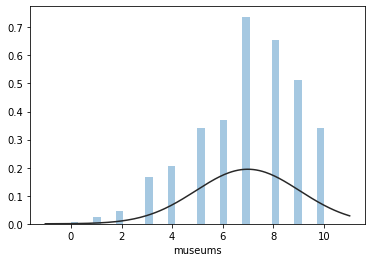

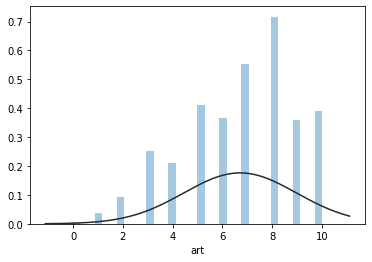

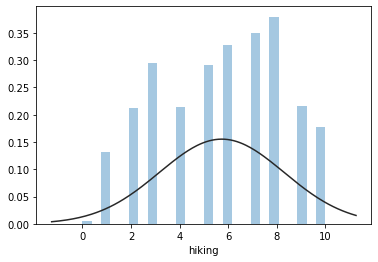

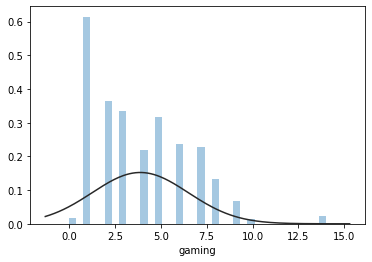

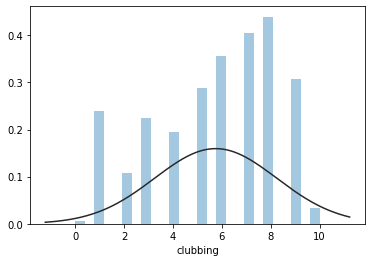

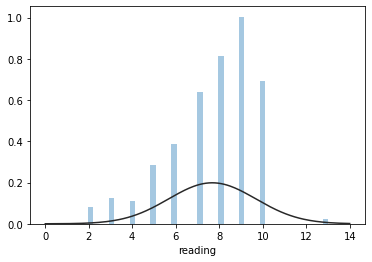

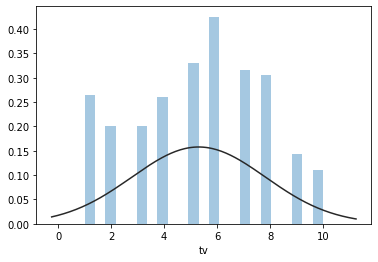

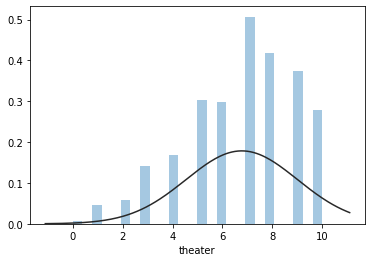

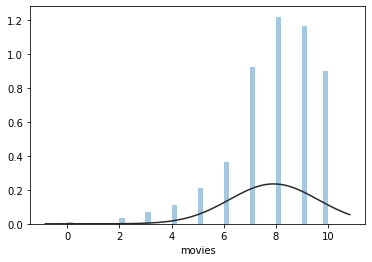

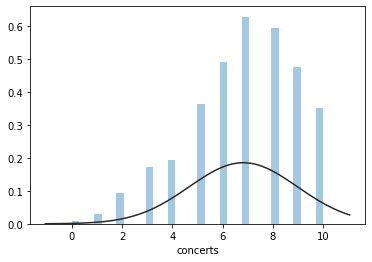

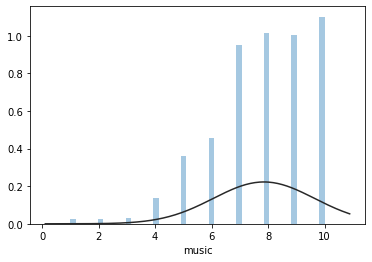

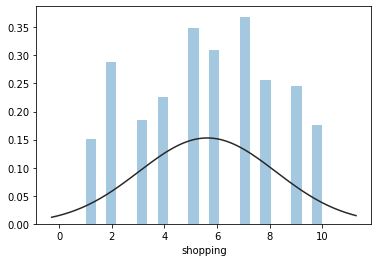

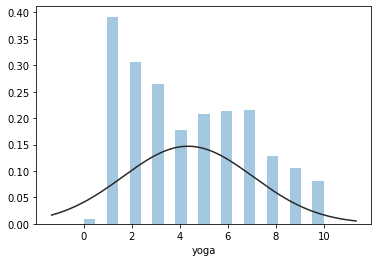

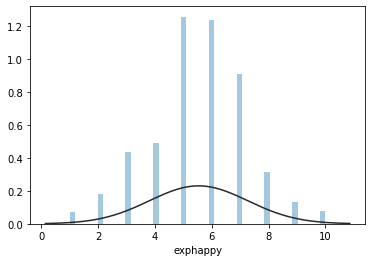

In [73]:
for col in range(0, df2.shape[1]):
  sns.distplot(df2[df2.columns[col]], fit = norm, kde = False)
  plt.show()

In [ ]:
for col in range(0, df3.shape[1]):
  sns.catplot([df3.columns[col]], data = df3, saturation=.5,
                kind="bar", ci=None, aspect=.6)
  plt.show()

### Données du partenaires

In [ ]:
## Les variables des données du partenaire
var_part = ['age_o', 'race_o',	'pf_o_att',	'pf_o_sin',	'pf_o_int',	'pf_o_fun',
            'pf_o_amb',	'pf_o_sha',	'dec_o	attr_o', 'sinc_o',	'intel_o',
            'fun_o',	'amb_o',	'shar_o',	'like_o',	'prob_o',	'met_o']

var_qual2 = ['race_o']

## Variables qualitatives